In [1]:
import orbipy as op
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

[0.87299782 0.         0.13553809 0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         1.        ]
3.1053035127126054


/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


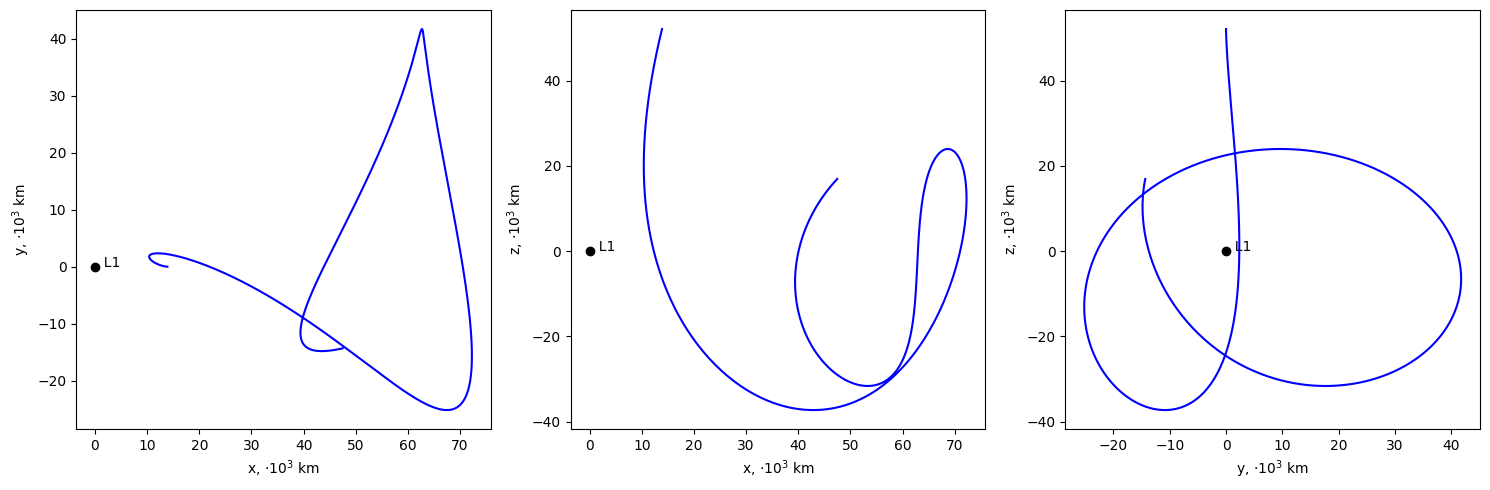

In [17]:
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
# halo_orbits = np.loadtxt('hlyapunov_sel1.csv')
halo_orbits = np.loadtxt('../data/datasets/halo_general_low_l1.csv', delimiter=',')

one_thousand_kms = (1-model.L1) / 61.350

i = 500

zero_state = model.get_zero_state().copy()
# zero_state[0] = halo_orbits[i][0]
# zero_state[2] = halo_orbits[i][1]
# zero_state[4] = (halo_orbits[i][2])

# 0.8729978246 0.1355380891 0.
zero_state[0] = 0.8729978246
zero_state[2] = 0.1355380891
zero_state[4] = (.0)

print(zero_state)
print(model.jacobi(zero_state))

df1 = model.prop(zero_state, 0, np.pi)

plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax1 = plotter.plot_proj(df1, centers={'x':model.L1})
plotter.plot_proj(ax=ax1, centers={'x':model.L1}, plottables=[plotter.L1], colors='k',ls='',marker='o')


In [18]:
event_left = op.eventSPL(model, model.jacobi(zero_state), accurate=False)
event_right = op.eventSPL(model, model.jacobi(zero_state), left=False, accurate=False)
first_correction = op.border_correction(model, op.y_direction(), event_left, event_right,  dv0=0.01, maxt=1000.)

dv = first_correction.calc_dv(0, zero_state)
zero_state += dv
print(zero_state)

[ 0.87299782  0.          0.13553809  0.         -0.02859596  0.
  1.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          0.          1.        ]


In [13]:
event_left = op.eventSPL(model, model.jacobi(zero_state), accurate=False)
event_right = op.eventSPL(model, model.jacobi(zero_state), left=False, accurate=False)
first_correction = op.border_correction(model, op.y_direction(), event_left, event_right,  dv0=0.01, maxt=1000.)
correction = op.border_correction(model, op.unstable_direction(model), event_left, event_right, dv0=0.01, maxt=1000.)

impulse_correction = op.simple_station_keeping(model, first_correction, correction, rev=np.pi/4)

df = impulse_correction.prop(0.0, zero_state, N=20)

Simple station-keeping: 0 1 

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/scipy/integrate/_ode.py:431: UserWarning: dopri5: larger nsteps is needed
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


RuntimeError: Borders unreachable

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


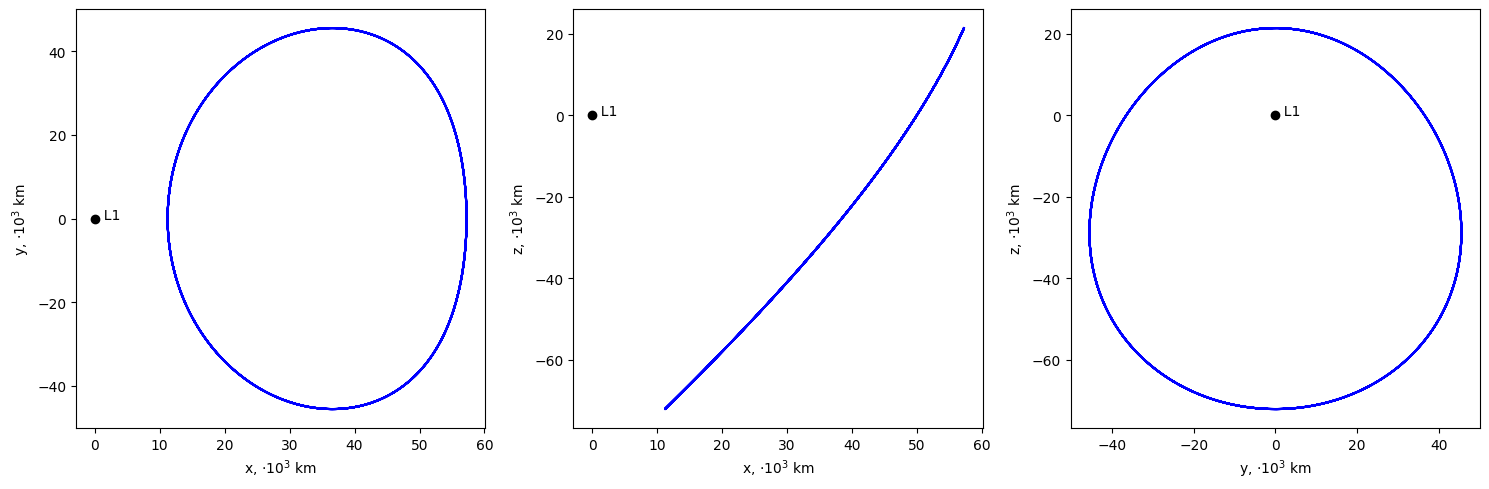

In [17]:
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(df, centers={'x':model.L1})
plotter.plot_proj(ax=ax, centers={'x':model.L1}, plottables=[plotter.L1], colors='k',ls='',marker='o')

[ 0.89773756  0.          0.          0.         -0.39255758  0.
  1.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          0.          1.        ]
3.093026792194549


/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


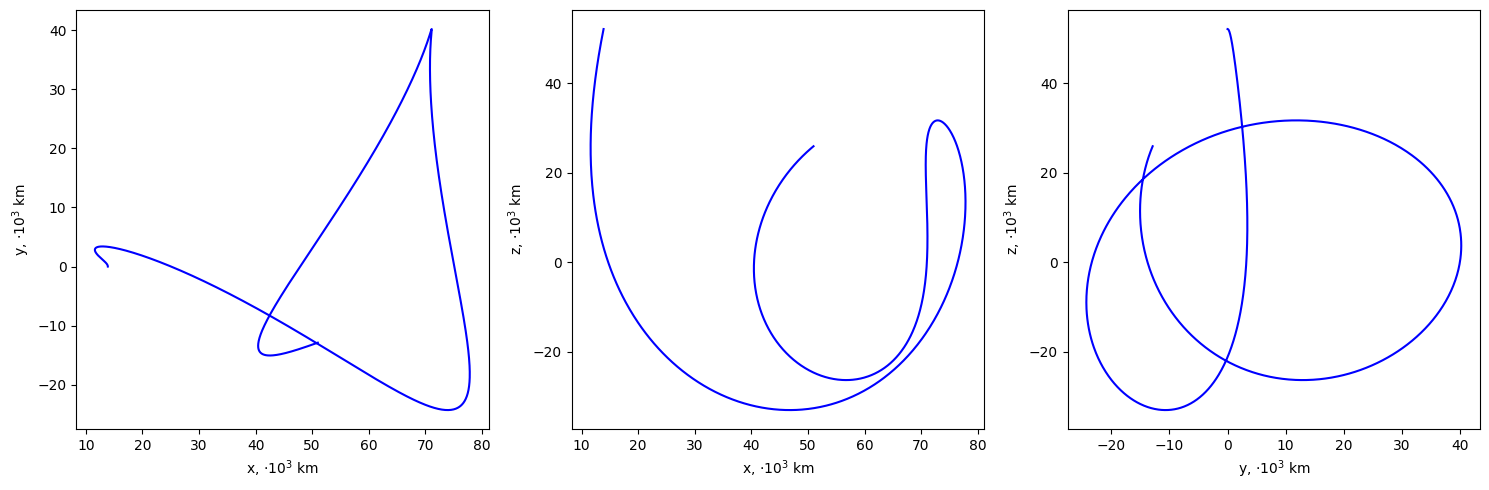

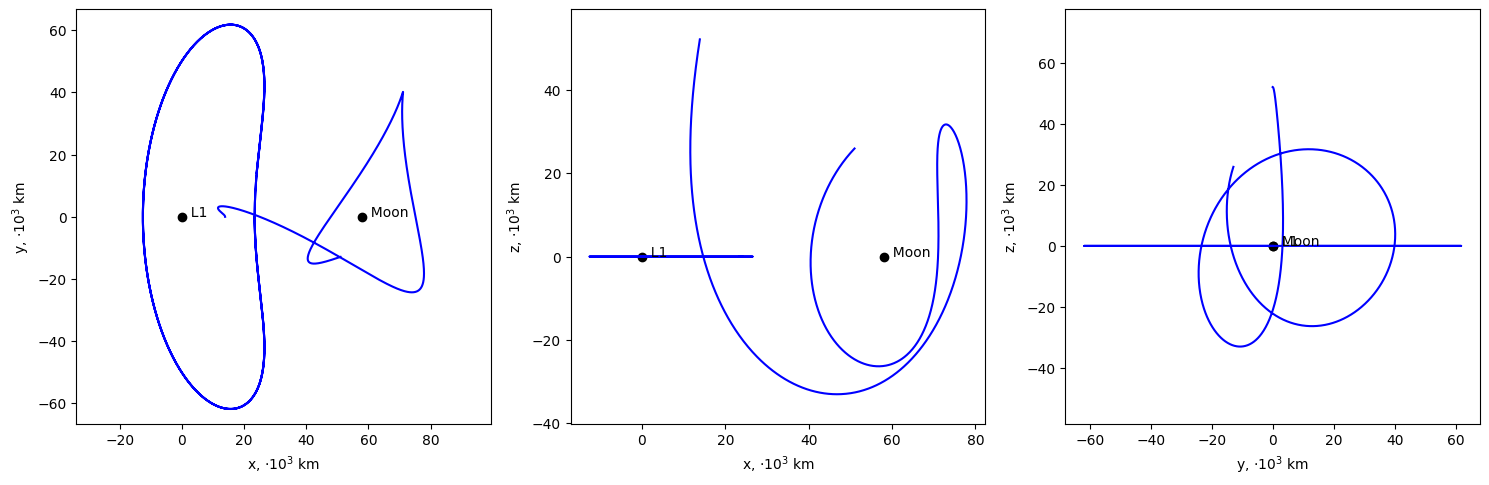

In [8]:
plotter.plot_proj(df1, centers={'x':model.L1})
tmp = np.loadtxt('../data/datasets/HLY_L1_Earth-Moon (default).csv')

zero_state = model.get_zero_state().copy()
i = 589
# i = 690
zero_state[0] = tmp[i][0]
zero_state[2] = tmp[i][2]
zero_state[4] = tmp[i][4]

print(zero_state)
print(model.jacobi(zero_state))

df2 = model.prop(zero_state, 0, np.pi*3)

plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(centers={'x':model.L1}, plottables=[plotter.L1, plotter.m], colors='k',ls='',marker='o')
ax[0].axis('equal')
ax[1].axis('equal')
ax[2].axis('equal')
plotter.plot_proj(df1, ax=ax, centers={'x':model.L1})
plotter.plot_proj(df2, ax=ax, centers={'x':model.L1})


In [ ]:
# ==========================================================

In [9]:
def calc_v(xy, J):
    return 2*model.omega(np.array([xy[0], xy[1], 0.0])) - J

In [14]:
# calculate horizontal lyapunov orbit, forbidden zone, split point
xy = []
for th in event_left.theta:
    xy.append(event_left.get_xy(th))

spl_th = event_left.split_theta
spl_xy = event_left.get_xy(spl_th)
xy = np.array(xy)

vel2 = np.array([calc_v(xyi, model.jacobi(zero_state)) for xyi in xy])
mask = (vel2 <= 0)
#np.any(mask)

xy = pd.DataFrame({'x':xy[:,0], 'y':xy[:,1]})
spl_xy = pd.DataFrame({'x':[spl_xy[0]], 'y':[spl_xy[1]]})

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


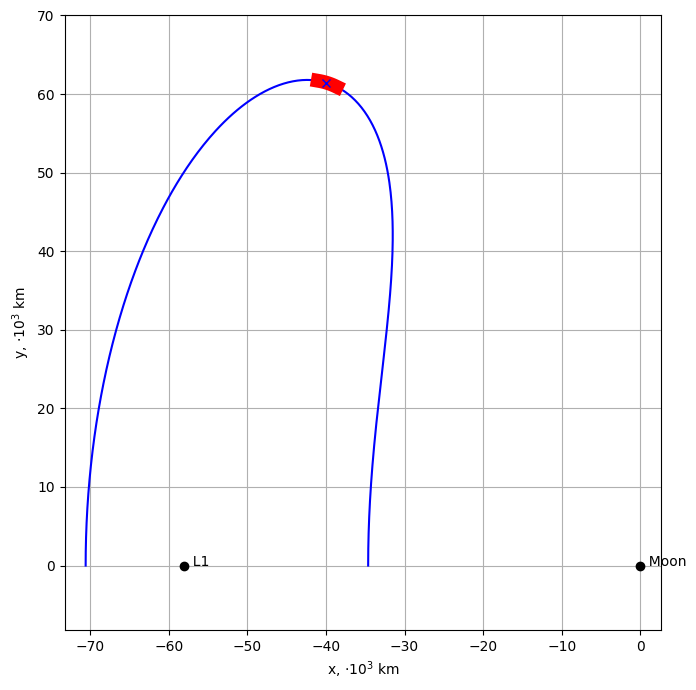

In [15]:
# plot all in x-y projection
ax = plotter.plot_proj(xy, fsize=(7,7), projections=('x-y',), centers={'x':model.mu1})
ax.axis('equal')
plotter.plot_proj(xy[mask], ax=ax, projections=('x-y',), centers={'x':model.mu1}, colors='r', linewidth=10)
plotter.plot_proj(spl_xy, ax=ax, projections=('x-y',), centers={'x':model.mu1}, marker='x')
# plotter.plot_proj(df, ax=ax, projections=('x-y',), centers={'x':model.mu1}, colors='g');

plotter.plot_proj(plottables=[plotter.L1, plotter.m], projections=('x-y',), ax=ax,
                  centers={'x':model.mu1}, marker='o', colors='k',
                 grid=True)
#ax.set_xlim(-100, 100)

In [39]:
# ============================================

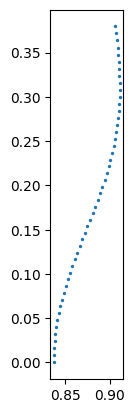

In [52]:
data_zvl = np.load('../data/contour_points/zvl/zvl_3.npy')[:50]
plt.scatter(data_zvl[:,0], data_zvl[:,1], s=2)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

In [41]:
from scipy.optimize import bisect

def calculate_next_point_with_same_jacoby_constant(correction, previous_state, cj, previous_alpha_degrees):
    def find_alpha(alpha_degrees):
        state = model.get_zero_state().copy()
        x = previous_state[0] + np.cos(np.radians(alpha_degrees))*dr
        z = previous_state[2] + np.sin(np.radians(alpha_degrees))*dr
        state[[0,2]] = x, z
        state[4] = previous_state[4]
        np.set_printoptions(precision=10)
        print(f"    {state[[0, 2, 4]]}")
        velocity = correction.calc_dv(0, state)
        state += velocity
        cj_new = model.jacobi(state)
        return cj - cj_new

    # print(find_alpha(previous_alpha_degrees-15))

    res = bisect(find_alpha, previous_alpha_degrees - 30, previous_alpha_degrees + 30,
        xtol=1e-6, maxiter=100,
        full_output=True)

    target_alpha_degrees = res[0]
    print("cj = "+ str(cj) + "; alpha = " + str(target_alpha_degrees))
    r = model.get_zero_state().copy()
    x = previous_state[0] + np.cos(np.radians(target_alpha_degrees))*dr
    z = previous_state[2] + np.sin(np.radians(target_alpha_degrees))*dr
    vy = previous_state[4]
    r[[0, 2, 4]] = x, z, vy
    np.set_printoptions(precision=10)
    print(f"   resulted point: {r[:3]}")
    r += correction.calc_dv(0, r)
    return r, target_alpha_degrees

def calculate_contour_line_of_jakobi_constant(model, initial_state, alpha, points):
    Cj = model.jacobi(initial_state)

    points.append(initial_state[[0, 2, 4]].tolist())


    while points[-1][1] > 0:
        left = op.eventSPL(model, Cj, accurate=False)
        right = op.eventSPL(model, Cj, accurate=False, left=False)

        correction = op.border_correction(model, op.y_direction(), left, right, dv0=0.01, maxt=1000.)

        try:
            next_point_with_same_jakoby_constant, alpha = calculate_next_point_with_same_jacoby_constant(correction, initial_state, Cj, alpha)
        except (RuntimeError, ValueError) as e:
            print(e, sep=' ')
            print(f"next point from {points[-1]} failed!")
            break
        initial_state = next_point_with_same_jakoby_constant
        points.append(initial_state[[0, 2, 4]].tolist())
        print(points[-1])
    print("==== Finished ====")

In [42]:
import pickle
data = np.load('../data/contour_points/zvl/zvl_3.npy')
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)

one_thousand_kms = (1-model.L1) / 61.350
dr = 3*one_thousand_kms
points = []

initial_state_points = np.array(np.meshgrid(np.arange(17, 19), [0, 180])).T.reshape(-1, 2).tolist() ## np.arange(5, 52)
print(initial_state_points)

for point in initial_state_points:
    alpha = point[1]
    initial_state = model.get_zero_state()
    initial_state[[0,2]] = data[point[0]][0], data[point[0]][1]

    new_points = []
    print(f"ZVL: {point}")
    calculate_contour_line_of_jakobi_constant(model, initial_state, alpha, new_points)
    print(new_points)
    points.append(new_points)
    with open("../data/contour_points/contour_points_data_spl_3-1.pickle", 'wb') as handle:
        pickle.dump(points, handle, protocol=pickle.HIGHEST_PROTOCOL)


[[17, 0], [17, 180], [18, 0], [18, 180]]
ZVL: [17, 0]
    [0.8729978246 0.1275614905 0.          ]
    [0.8729978246 0.1355380891 0.          ]
f(a) and f(b) must have different signs
next point from [0.8660898876614903, 0.13154978979953738, 0.0] failed!
==== Finished ====
[[0.8660898876614903, 0.13154978979953738, 0.0]]
ZVL: [17, 180]
    [0.8591819507 0.1355380891 0.          ]
    [0.8591819507 0.1275614905 0.          ]
    [0.8581132891 0.1315497898 0.          ]
    [0.8583850851 0.1336142854 0.          ]
    [0.85818153   0.1325909448 0.          ]
    [0.8581303676 0.1320714843 0.          ]
    [0.8581516986 0.1323316332 0.          ]
    [0.8581655535 0.132461411  0.          ]
    [0.8581583606 0.1323965504 0.          ]
    [0.8581618908 0.1324289881 0.          ]
    [0.8581601091 0.1324127711 0.          ]
    [0.8581609958 0.13242088   0.          ]
    [0.8581605514 0.1324168257 0.          ]
    [0.8581607733 0.1324188529 0.          ]
    [0.8581606623 0.1324178393 0

(52, 3)
[[0.8368785595 0.           0.          ]
 [0.8369961307 0.007975732  0.          ]
 [0.8373481195 0.0159445606 0.          ]
 [0.8379323558 0.0238997345 0.          ]
 [0.8387452383 0.0318348052 0.          ]
 [0.8397817568 0.0397437719 0.          ]
 [0.8410355203 0.0476212208 0.          ]
 [0.8424987959 0.0554624547 0.          ]
 [0.844162551  0.0632636113 0.          ]
 [0.8460164991 0.0710217683 0.          ]
 [0.8480491538 0.0787350322 0.          ]
 [0.8502478793 0.0864026088 0.          ]
 [0.8525989481 0.0940248525 0.          ]
 [0.8550875967 0.1016032925 0.          ]
 [0.8576980851 0.1091406312 0.          ]
 [0.860413759  0.1166407139 0.          ]
 [0.863217117  0.1241084651 0.          ]
 [0.8660898877 0.1315497898 0.          ]
 [0.8690131195 0.1389714365 0.          ]
 [0.8719672915 0.1463808219 0.          ]
 [0.8749324488 0.153785818  0.          ]
 [0.8778883723 0.1611945049 0.          ]
 [0.8808147869 0.1686148972 0.          ]
 [0.8836916107 0.176054655

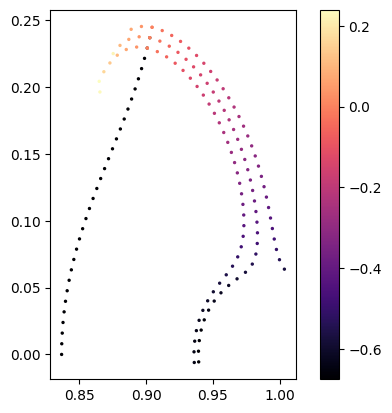

In [15]:
from matplotlib import pyplot as plt

data = np.load('../data/contour_points/zvl/zvl_3.npy')
data = np.c_[data, np.zeros(len(data))]
print(data.shape)

data_points = []
for line in points:
    for point in line:
        data_points.append(point)

data_points = np.array(data_points)

print(data)
plt.scatter(data[:32,0], data[:32,1], c=data[:32,2], cmap='magma', s=2)
plt.scatter(data_points[:,0], data_points[:,1], c=data_points[:,2], cmap='magma', s=2)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

[[0.8368785595 0.           0.          ]
 [0.8369961307 0.007975732  0.          ]
 [0.8373481195 0.0159445606 0.          ]
 [0.8379323558 0.0238997345 0.          ]
 [0.8387452383 0.0318348052 0.          ]
 [0.8397817568 0.0397437719 0.          ]
 [0.8410355203 0.0476212208 0.          ]
 [0.8424987959 0.0554624547 0.          ]
 [0.844162551  0.0632636113 0.          ]
 [0.8460164991 0.0710217683 0.          ]
 [0.8480491538 0.0787350322 0.          ]
 [0.8502478793 0.0864026088 0.          ]
 [0.8525989481 0.0940248525 0.          ]
 [0.8550875967 0.1016032925 0.          ]
 [0.8576980851 0.1091406312 0.          ]
 [0.860413759  0.1166407139 0.          ]
 [0.863217117  0.1241084651 0.          ]
 [0.8660898877 0.1315497898 0.          ]
 [0.8690131195 0.1389714365 0.          ]
 [0.8719672915 0.1463808219 0.          ]
 [0.8749324488 0.153785818  0.          ]
 [0.8778883723 0.1611945049 0.          ]
 [0.8808147869 0.1686148972 0.          ]
 [0.8836916107 0.1760546558 0.    

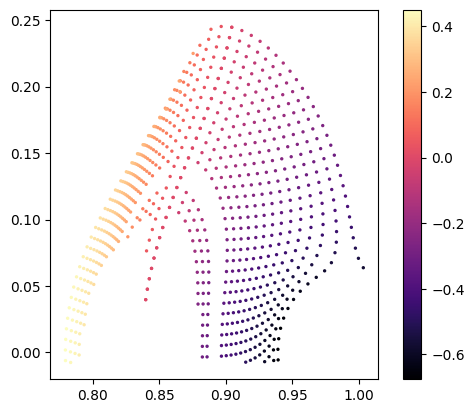

In [19]:
from matplotlib import pyplot as plt
#
# data = np.load('data/contour_points/zvl/zvl_3.npy')
# data = np.c_[data, np.zeros(len(data))]
# print(data.shape)
import pickle
with open(r"../data/contour_points/contour_points_data_spl_3.pickle", "rb") as input_file:
    points = pickle.load(input_file)


data_points = []
for line in points:
    for point in line:
        data_points.append(point)

data_points = np.array(data_points)

print(data)
# plt.scatter(data[:32,0], data[:32,1], c=data[:32,2], cmap='magma', s=2)
plt.scatter(data_points[:,0], data_points[:,1], c=data_points[:,2], cmap='magma', s=2)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

[[0.8368785595 0.           0.          ]
 [0.8369961307 0.007975732  0.          ]
 [0.8373481195 0.0159445606 0.          ]
 [0.8379323558 0.0238997345 0.          ]
 [0.8387452383 0.0318348052 0.          ]
 [0.8397817568 0.0397437719 0.          ]
 [0.8410355203 0.0476212208 0.          ]
 [0.8424987959 0.0554624547 0.          ]
 [0.844162551  0.0632636113 0.          ]
 [0.8460164991 0.0710217683 0.          ]
 [0.8480491538 0.0787350322 0.          ]
 [0.8502478793 0.0864026088 0.          ]
 [0.8525989481 0.0940248525 0.          ]
 [0.8550875967 0.1016032925 0.          ]
 [0.8576980851 0.1091406312 0.          ]
 [0.860413759  0.1166407139 0.          ]
 [0.863217117  0.1241084651 0.          ]
 [0.8660898877 0.1315497898 0.          ]
 [0.8690131195 0.1389714365 0.          ]
 [0.8719672915 0.1463808219 0.          ]
 [0.8749324488 0.153785818  0.          ]
 [0.8778883723 0.1611945049 0.          ]
 [0.8808147869 0.1686148972 0.          ]
 [0.8836916107 0.1760546558 0.    

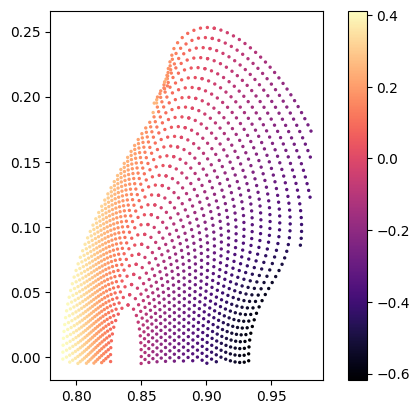

In [30]:
from matplotlib import pyplot as plt
#
# data = np.load('data/contour_points/zvl/zvl_3.npy')
# data = np.c_[data, np.zeros(len(data))]
# print(data.shape)
import pickle
with open(r"../data/contour_points/contour_points_data_6_points.pickle", "rb") as input_file:
    points = pickle.load(input_file)


data_points = []
for line in points[:58]:
    for point in line:
        data_points.append(point)

data_points = np.array(data_points)

print(data)
# plt.scatter(data[:32,0], data[:32,1], c=data[:32,2], cmap='magma', s=2)
plt.scatter(data_points[:,0], data_points[:,1], c=data_points[:,2], cmap='magma', s=2)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

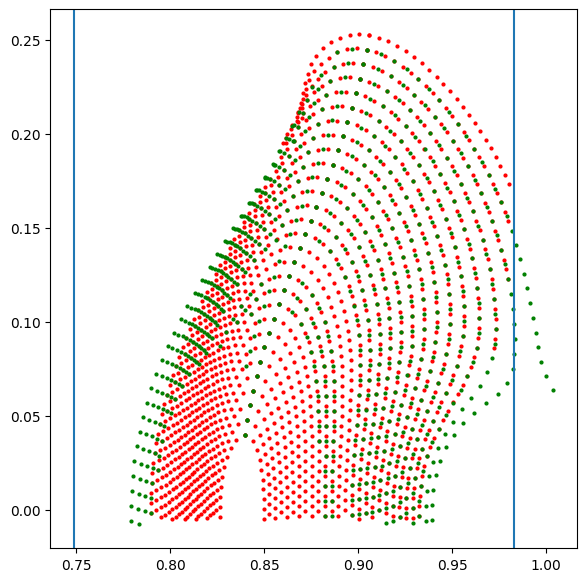

In [36]:
from matplotlib import pyplot as plt
#
# data = np.load('data/contour_points/zvl/zvl_3.npy')
# data = np.c_[data, np.zeros(len(data))]
# print(data.shape)
import pickle
with open(r"../data/contour_points/contour_points_data_6_points.pickle", "rb") as input_file:
    points = pickle.load(input_file)


data_points_surface = []
for line in points[:58]:
    for point in line:
        data_points_surface.append(point)

data_points_surface = np.array(data_points_surface)


with open(r"../data/contour_points/contour_points_data_spl_3.pickle", "rb") as input_file:
    points = pickle.load(input_file)


data_points_spl = []
for line in points[:58]:
    for point in line:
        data_points_spl.append(point)

data_points_spl = np.array(data_points_spl)

plt.figure(figsize=(9, 7))
plt.scatter(data_points_surface[:,0], data_points_surface[:,1], s=4, color='r')
plt.scatter(data_points_spl[:,0], data_points_spl[:,1], s=4, color='g')
plt.axvline(x=model.L1 - 33 * one_thousand_kms)
plt.axvline(x=model.L1 + 55 * one_thousand_kms)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
# plt.colorbar()
plt.show()